<a href="https://www.kaggle.com/code/yunasheng/covid-19-simple-eda?scriptVersionId=167253878" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center"><img src="https://phil.cdc.gov//PHIL_Images/23312/23312_lores.jpg" width="100%" heigh="100%" alt="Retrieve&Re-Rank pipeline"></div>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
import os

In [5]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [6]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


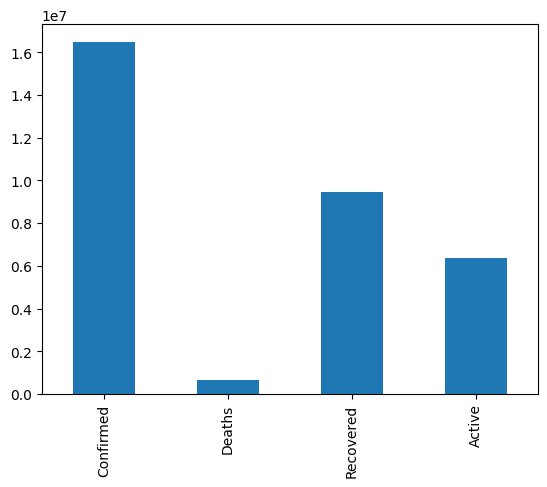

In [7]:
column_names = ['Confirmed','Deaths','Recovered','Active']
# Calulate the sum of specified columns
column_sums = df[column_names].sum().plot(kind="bar")

In [8]:
Region = df.groupby(by='WHO Region').sum()
Region

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
WHO Region,,,,,,,,,,,,,,
Africa,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,723207,12223,440645,270339,12176,353,14563,110.71,2736.71,inf,608120,115087,868.15
Americas,Antigua and BarbudaArgentinaBahamasBarbadosBel...,8839286,342732,4468616,4027938,129531,3555,94776,106.84,2180.20,inf,7815198,1024088,571.59
Eastern Mediterranean,AfghanistanBahrainDjiboutiEgyptIranIraqJordanK...,1490744,38339,1201400,251005,12410,445,14843,78.39,1465.05,inf,1398847,91897,230.61
Europe,AlbaniaAndorraArmeniaAustriaAzerbaijanBelarusB...,3299523,211144,1993723,1094656,22294,304,11732,235.11,3843.56,inf,3146816,152707,435.10
South-East Asia,BangladeshBhutanBurmaIndiaIndonesiaMaldivesNep...,1835297,41349,1156933,637015,48993,734,37582,12.96,667.04,19.56,1478283,357014,85.13
Western Pacific,AustraliaBruneiCambodiaChinaFijiJapanLaosMalay...,292428,8249,206770,77409,3289,24,1127,20.64,1228.88,28.60,266359,26069,353.78


Text(0.5, 1.0, ' Confirmed Cases')

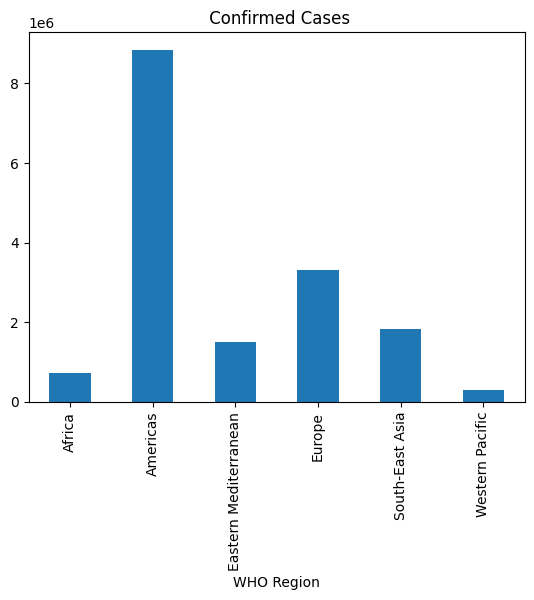

In [9]:
Region['Confirmed'].plot(kind='bar', ) 
plt.title(' Confirmed Cases')

Text(0.5, 1.0, ' Death')

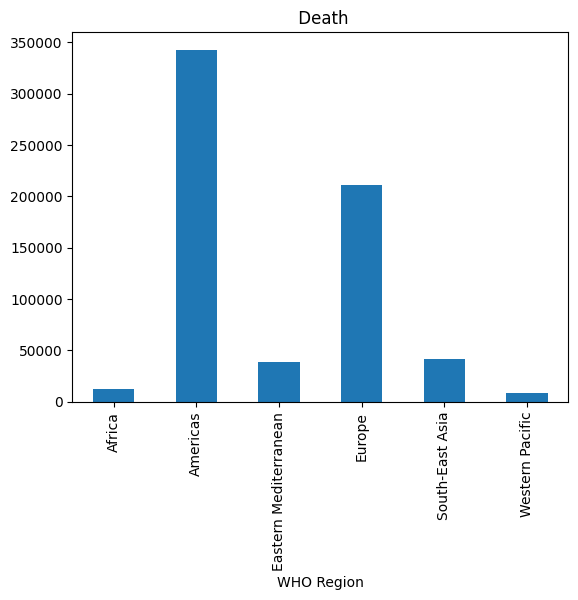

In [10]:
Region['Deaths'].plot(kind='bar', ) 
plt.title(' Death')

Text(0.5, 1.0, ' Recovered')

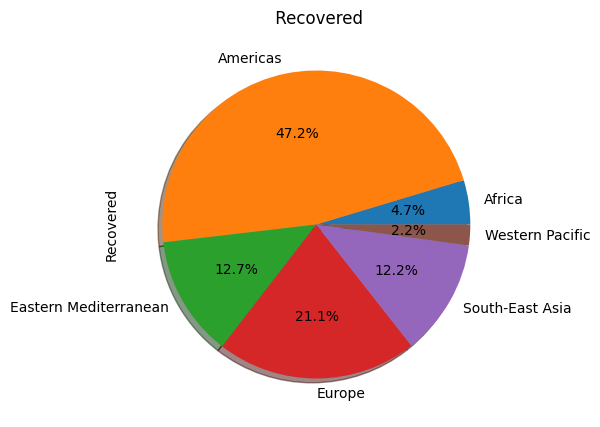

In [11]:
Region['Recovered'].plot(kind='pie',  figsize=(10,5), shadow=True, autopct='%1.1f%%') 
plt.title(' Recovered')

Text(0.5, 1.0, ' Active')

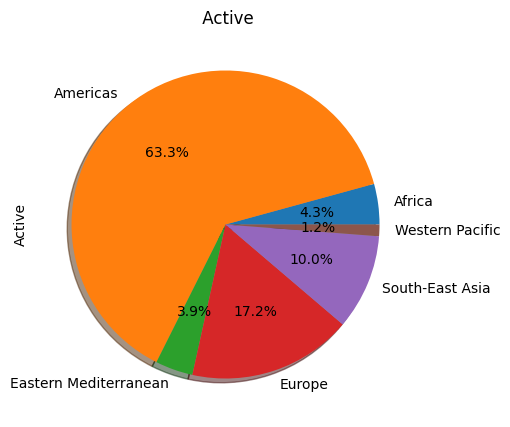

In [12]:
Region['Active'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%1.1f%%') # autopct create % ) 
plt.title(' Active')